In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

In [40]:
data = pd.read_csv("weight-height.csv")

In [41]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [42]:
data.Gender.value_counts()

Female    5000
Male      5000
Name: Gender, dtype: int64

In [43]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [44]:
#Smote, RandomSampler, Imblearn

In [45]:
data.groupby("Gender").agg({'Height':['mean','min','max']})

Height                      
             mean        min        max
Gender                                 
Female  63.708774  54.263133  73.389586
Male    69.026346  58.406905  78.998742

In [46]:
data.groupby("Gender").agg({'Weight':['mean','min','max']})

Weight                        
              mean         min         max
Gender                                    
Female  135.860093   64.700127  202.237214
Male    187.020621  112.902939  269.989699

In [47]:
data["Gender"] = np.where(data["Gender"]=="Male",0,1)

In [53]:
X =  data[["Height","Weight"]]
y= data[["Gender"]]

In [54]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.3, random_state = 0)

In [55]:
model = LogisticRegression()

In [56]:
model.fit(train_X, train_y)

C:\Users\Prabhu\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

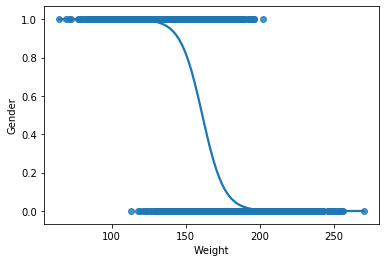

In [58]:
import seaborn as sns
sns.regplot (x= 'Weight', y = 'Gender', data=data, logistic=True)

In [59]:
model.coef_

array([[ 0.49548897, -0.20348725]])

In [60]:
model.intercept_

array([0.01041207])

In [61]:
train_pred= model.predict(train_X)
test_pred = model.predict(test_X)

In [67]:
def metric_res(actual, pred):
    print("confusion_matrix", confusion_matrix(actual,pred))
    print("accuracy_score", accuracy_score(actual,pred))
    print("recall_score", recall_score(actual,pred))
    print("precision_score", precision_score(actual,pred))
    print("f1_score", f1_score(actual,pred))
    print("roc_auc_score", roc_auc_score(actual,pred))

In [68]:
metric_res(train_y,train_pred)

confusion_matrix [[3215  274]
 [ 291 3220]]
accuracy_score 0.9192857142857143
recall_score 0.9171176303047565
precision_score 0.9215798511734402
f1_score 0.9193433261955746
roc_auc_score 0.919292549746818


In [69]:
metric_res(test_y,test_pred)

confusion_matrix [[1371  140]
 [ 104 1385]]
accuracy_score 0.9186666666666666
recall_score 0.9301544660846206
precision_score 0.9081967213114754
f1_score 0.9190444591904446
roc_auc_score 0.9187502972382071


In [70]:
import sklearn
sklearn.__version__

'0.22.1'

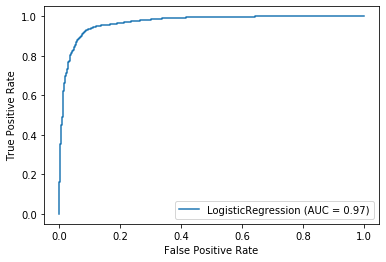

In [71]:
plot_roc_curve(model, test_X, test_y)

In [72]:
X = data[["Height"]]
y = data["Gender"]

In [73]:
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

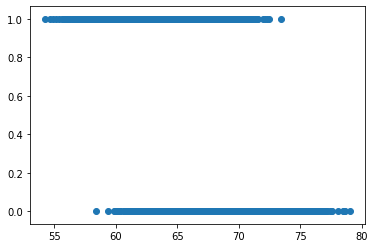

In [74]:
plt.scatter(X,y)

In [76]:
model.predict_proba(X)[:,1]

array([0.00588925, 0.15837284, 0.00492571, ..., 0.84352759, 0.13673511,
       0.95249272])

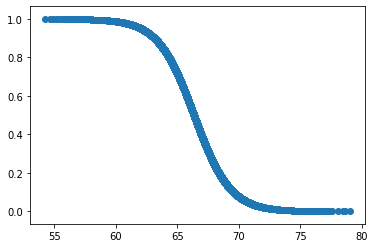

In [77]:
plt.scatter(X,model.predict_proba(X)[:,1])

In [78]:
model.predict_proba(X)

array([[0.99411075, 0.00588925],
       [0.84162716, 0.15837284],
       [0.99507429, 0.00492571],
       ...,
       [0.15647241, 0.84352759],
       [0.86326489, 0.13673511],
       [0.04750728, 0.95249272]])